In [17]:
import numpy as np 
import TdistillationKet
import json

fid_list = [1, 0.995, 0.99, 0.985, 0.98]
epsilon_list = np.linspace(0, 0.1, 21)

data_file = open('Trate1.dat', 'w+')
data_file.close()

data_file = open('Trate_var1.dat', 'w+')
data_file.close()

data_file = open('Taccuracy1.dat', 'w+')
data_file.close()

data_file = open('Taccuracy_var1.dat', 'w+')
data_file.close()

# with open('Trate.dat', 'a') as rate_file, open('Trate_var.dat', 'a') as rate_var_file, open('Taccuracy.dat', 'a') as accuracy_file, open('Taccuracy_var.dat', 'a') as accuracy_var_file: 
#     for fid in fid_list:
#         p = 1 - np.sqrt(fid)
#         rate = []
#         rate_var = []
#         accuracy = []
#         accuracy_var = []
#         for epsilon in epsilon_list:
#             rt, v_rt, ac, v_ac = TdistillationKet.experiment(epsilon, p, p)
#             rate.append(rt)
#             rate_var.append(v_rt)
#             accuracy.append(ac)
#             accuracy_var.append(v_ac)
#         print('finish fid =', fid)
#         json.dump(rate, rate_file)
#         rate_file.write('\n')
#         json.dump(rate_var, rate_var_file)
#         rate_var_file.write('\n')
#         json.dump(accuracy, accuracy_file)
#         accuracy_file.write('\n')
#         json.dump(accuracy_var, accuracy_var_file)
#         accuracy_var_file.write('\n')

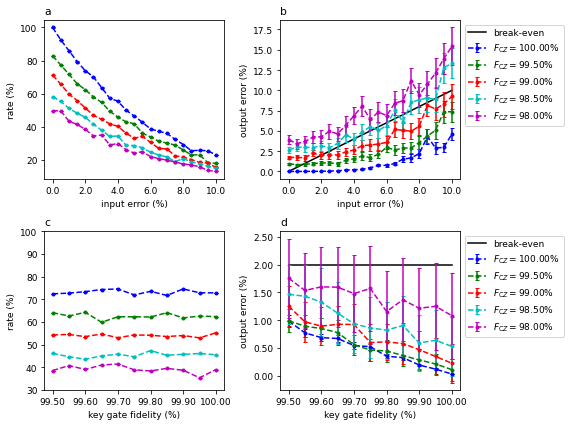

In [19]:
import numpy as np
import json
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

plt.rcParams.update({'font.size': 9})

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

fid_list = [1, 0.995, 0.99, 0.985, 0.98]
epsilon_list = np.linspace(0, 0.1, 21)
colour_list = ['b', 'g', 'r', 'c', 'm']

# ax[0,1].plot(epsilon_list, 35 * epsilon_list ** 3)
ax[0,1].plot(epsilon_list, epsilon_list, color = 'k' , label = 'break-even')

with open('Trate.dat', 'r') as rate_file, open('Trate_var.dat', 'r') as rate_var_file, open('Taccuracy.dat', 'r') as accuracy_file, open('Taccuracy_var.dat', 'r') as accuracy_var_file: 
        for (rl, vrl, al, val, fid, c) in zip(rate_file, rate_var_file, accuracy_file, accuracy_var_file, fid_list, colour_list):
            rate_list = json.loads(rl)
            accuracy_list = json.loads(al)
            rate_var_list = json.loads(vrl)
            accuracy_var_list = json.loads(val)
            # p = 1 - np.sqrt(fid)

            ax[0,0].errorbar(epsilon_list, rate_list, yerr = rate_var_list, color = c, fmt = '.--', capsize = 2)
            # ax[0].plot(epsilon_list, 1-7*epsilon_list-22*p, label = 'leading order')
            
            # ax[1].set_title('rate')
            ax[0,1].errorbar(epsilon_list, accuracy_list, yerr = accuracy_var_list, color = c, fmt = '.--', label = r'$F_{\mathrm{C}Z} = $' + f'{100 * fid:.2f}' + '%', capsize = 2)
            # ax[1].plot(epsilon_list, 7*epsilon_list**3+2*p, label = 'leading order')
            # ax[1].set_xscale('log')
            # ax[1].set_yscale('log')

ax[0,0].set_xlabel('input error (%)')
ax[0,0].set_ylabel('rate (%)')
ax[0,0].set_title('a', loc = 'left')
# ax[0,0].legend()
ax[0,1].set_xlabel('input error (%)')
ax[0,1].set_ylabel('output error (%)')
ax[0,1].set_title('b', loc = 'left')
ax[0,1].legend(bbox_to_anchor = (1,1))

fid_q_list = np.linspace(0.995, 1, 11)
fid_p_list = [1, 0.995, 0.99, 0.985, 0.98]

ax[1,1].plot(fid_q_list, [0.02]*11, color = 'k', label = 'break-even')

with open('Trate1.dat', 'r') as rate_file, open('Trate_var1.dat', 'r') as rate_var_file, open('Taccuracy1.dat', 'r') as accuracy_file, open('Taccuracy_var1.dat', 'r') as accuracy_var_file: 
        for (rl, vrl, al, val, fid_p, c) in zip(rate_file, rate_var_file, accuracy_file, accuracy_var_file, fid_list, colour_list):
            rate_list = json.loads(rl)
            accuracy_list = json.loads(al)
            rate_var_list = json.loads(vrl)
            accuracy_var_list = json.loads(val)
            # p = 1 - np.sqrt(fid)

            ax[1,0].errorbar(fid_q_list, rate_list, yerr = rate_var_list, color = c, fmt = '.--', capsize = 2)
            # ax[0].plot(epsilon_list, 1-7*epsilon_list-22*p, label = 'leading order')
            
            # ax[1].set_title('rate')
            ax[1,1].errorbar(fid_q_list, accuracy_list, yerr = accuracy_var_list, color = c, fmt = '.--', label = r'$F_{\mathrm{C}Z} = $' + f'{100 * fid_p:.2f}' + '%', capsize = 2)
            # ax[1].plot(epsilon_list, 7*epsilon_list**3+2*p, label = 'leading order')
            # ax[1].set_xscale('log')
            # ax[1].set_yscale('log')

ax[1,0].set_xlabel('key gate fidelity (%)')
ax[1,0].set_ylabel('rate (%)')
ax[1,0].set_ylim(0.3, 1)
ax[1,0].set_title('c', loc = 'left')
# ax[1,0].legend()
ax[1,1].set_xlabel('key gate fidelity (%)')
ax[1,1].set_ylabel('output error (%)')
ax[1,1].set_title('d', loc = 'left')
ax[1,1].legend(bbox_to_anchor = (1,1))

for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_major_formatter(mtick.PercentFormatter(1, symbol= None))
        ax[i,j].yaxis.set_major_formatter(mtick.PercentFormatter(1, symbol= None))

plt.tight_layout()
fig.savefig('Tfinal.pdf', bbox_inches='tight')

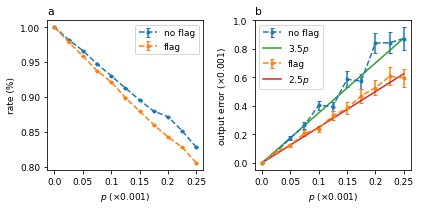

In [31]:
import numpy as np
import json
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

plt.rcParams.update({'font.size': 9})

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

plist = np.linspace(0.0025,0,11)
acrc = [0.008718707244773416, 0.0084248777461845, 0.008405705202331859, 0.0057328125205746705, 0.005867029806794211, 0.003950867515716605, 0.004039483729736948, 0.0026279597164655666, 0.001730710366028898, 0.0007701344307426972, 5.551115123125783e-16]
acrcflg = [0.005956491113242812, 0.006072938694788754, 0.005274209252873807, 0.004702797364881772, 0.0038306079748366972, 0.00331339339852299, 0.0023975963422274704, 0.0020812998300590024, 0.001252874837048945, 0.0007617514097562061, 4.440892098500626e-16]
acrc_err = [0.0007790545931722276, 0.0007226742052354862, 0.0006860739596423548, 0.0005238661272763519, 0.0005592732548531886, 0.0003377720390371046, 0.0003205322874816901, 0.00022214272220320082, 0.00013586055885701903, 5.2507997560128195e-05, 1.7385740134866123e-17]
acrcflg_err = [0.0006417764395697134, 0.0006300166380513248, 0.0005261096611125601, 0.00048740679267338284, 0.0004215464762059999, 0.000313867639771759, 0.00021716982201923742, 0.0001963698695662512, 0.0001056784124204216, 6.660462076431882e-05, 2.4385529919008657e-15]
rate = [0.8276663136881424, 0.8512247362343149, 0.8716719868658678, 0.8794150859694221, 0.895476346068011, 0.9126362288544189, 0.9303048007346, 0.9472276042456943, 0.9664049585926401, 0.9818907411788119, 0.9999999999999989]
rateflg = [0.8053203414912241, 0.827824180251846, 0.8426403948755241, 0.8601406301865022, 0.8794394655068507, 0.8990633083648951, 0.9212613889852573, 0.9375408463262574, 0.958694682594645, 0.9787331888198131, 0.9999999999996055]
rate_err = [7.358633627447991e-05, 7.555069622182481e-05, 7.727754185028682e-05, 7.794624058129518e-05, 7.932848627538523e-05, 8.078767973812707e-05, 8.233758060524175e-05, 8.381448248954396e-05, 8.548841572449314e-05, 8.684513901529981e-05, 8.844364220965302e-05]
rateflg_err = [7.161561392339674e-05, 7.356218350916642e-05, 7.48052240892387e-05, 7.631071000273634e-05, 7.793654830879163e-05, 7.961589714870441e-05, 8.154179661356514e-05, 8.296514116169966e-05, 8.481028807793848e-05, 8.65691345498462e-05, 8.844364220961823e-05]

ax[0].errorbar(plist, rate, yerr = rate_err, fmt = '.--', capsize = 2, label = 'no flag')
ax[0].errorbar(plist, rateflg, yerr = rateflg_err, fmt = '.--', capsize = 2, label = 'flag')
ax[0].legend()
ax[0].set_xlabel(r'$p\ (\times 0.001)$')
ax[0].set_xticks(np.linspace(0,0.0025,6), 100*np.linspace(0,0.0025,6))
ax[0].set_ylabel('rate (%)')
ax[0].set_title('a', loc = 'left')

ax[1].errorbar(plist, acrc, yerr = acrc_err, fmt = '.--', capsize = 2, label = 'no flag') 
ax[1].errorbar(plist, acrcflg, yerr = acrcflg_err, fmt = '.--', capsize = 2, label = 'flag')
ax[1].plot(plist, 3.5*plist, label = r'$3.5p$')
ax[1].plot(plist, 2.5*plist, label = r'$2.5p$')
handles, labels = ax[1].get_legend_handles_labels()
order = [2, 0, 3, 1]
ax[1].legend([handles [idx] for idx in order], [labels [idx] for idx in order])
ax[1].set_xlabel(r'$p\ (\times 0.001$)')
ax[1].set_xticks(np.linspace(0,0.0025,6), 100*np.linspace(0,0.0025,6))
ax[1].set_ylabel(r'output error ($\times 0.001$)')
ax[1].set_yticks(np.linspace(0,0.01,6), 100*np.linspace(0,0.01,6))
ax[1].set_title('b', loc = 'left')

plt.tight_layout()
fig.savefig('Tflag.pdf', bbox_inches='tight')